In [1]:
# This notebook focuses on evaluating the classification performance of three machine learning models—Logistic Regression, Decision Tree, and Support Vector Machine (SVM)—on synthetic genetic data generated using a Bootstrapped VAE.
# Finally, 5-fold stratified cross-validation was carried out to assess how well each classifier performs across multiple data splits, ensuring robustness and consistency in evaluation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Load the dataset
df = pd.read_csv('BootVAE_Genedata6.csv')

# Display the first few rows and check the structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Separate independent variables (X) and dependent variable (y)
X = df[['Adduct Code', 'Size Code', 'Sequence Code', 'Polymerase Code']]
y = df['Outcome Code']  # Replace 'Target Variable' with your actual target column name

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   Adduct Code  Size Code  Sequence Code  Polymerase Code  Outcome Code
0            1         12             14               10             2
1            1          9             13               11             2
2            1         11             12               11             2
3            1          6             11               16             2
4            1         14             13                9             2
Adduct Code        0
Size Code          0
Sequence Code      0
Polymerase Code    0
Outcome Code       0
dtype: int64


In [5]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
lr_y_pred = lr.predict(X_test_scaled)

# Evaluation
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)
lr_classification_rep = classification_report(y_test, lr_y_pred)

print("Logistic Regression")
print(f"Accuracy: {lr_accuracy:.2f}")
print("Confusion Matrix:")
print(lr_conf_matrix)
print("Classification Report:")
print(lr_classification_rep)
print("\n")

Logistic Regression
Accuracy: 0.81
Confusion Matrix:
[[ 10  29]
 [ 10 151]]
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.26      0.34        39
           2       0.84      0.94      0.89       161

    accuracy                           0.81       200
   macro avg       0.67      0.60      0.61       200
weighted avg       0.77      0.81      0.78       200





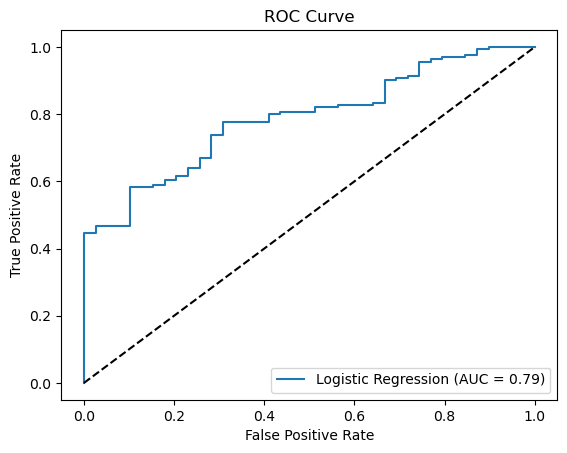

AUC: 0.79


In [7]:
# ROC Curve and AUC
lr_y_prob = lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lr_y_prob, pos_label=2)
lr_auc = roc_auc_score(y_test, lr_y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {lr_auc:.2f}")

In [9]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_y_pred = dt.predict(X_test_scaled)

# Evaluation
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_classification_rep = classification_report(y_test, dt_y_pred)

print("Decision Tree Classifier")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Confusion Matrix:")
print(dt_conf_matrix)
print("Classification Report:")
print(dt_classification_rep)
print("\n")

Decision Tree Classifier
Accuracy: 0.91
Confusion Matrix:
[[ 31   8]
 [ 11 150]]
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.79      0.77        39
           2       0.95      0.93      0.94       161

    accuracy                           0.91       200
   macro avg       0.84      0.86      0.85       200
weighted avg       0.91      0.91      0.91       200





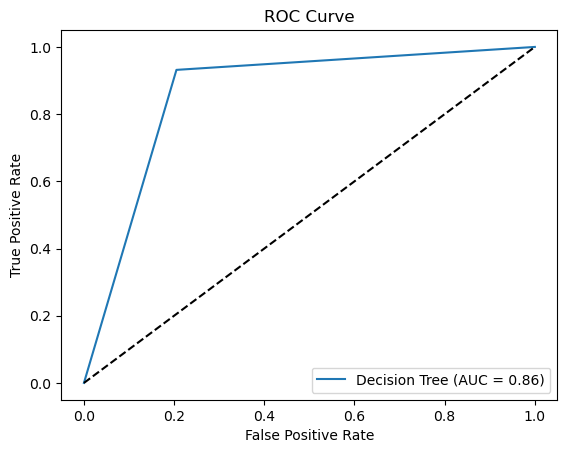

AUC: 0.86


In [11]:
# ROC Curve and AUC
dt_y_prob = dt.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_y_prob, pos_label=2)
dt_auc = roc_auc_score(y_test, dt_y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {dt_auc:.2f}")

In [13]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
# Initialize GridSearchCV with SVM model
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=3, cv=5)

# Fit GridSearchCV to the data
grid.fit(X_train_scaled, y_train)
# Get the best parameters
print("Best parameters found: ", grid.best_params_)

# Predict using the best model
best_svm = grid.best_estimator_
best_svm_y_pred = best_svm.predict(X_test_scaled)

# Evaluation
best_svm_accuracy = accuracy_score(y_test, best_svm_y_pred)
best_svm_conf_matrix = confusion_matrix(y_test, best_svm_y_pred)
best_svm_classification_rep = classification_report(y_test, best_svm_y_pred)

print("Improved Support Vector Machine (SVM)")
print(f"Accuracy: {best_svm_accuracy:.2f}")
print("Confusion Matrix:")
print(best_svm_conf_matrix)
print("Classification Report:")
print(best_svm_classification_rep)
print("\n")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.863 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.844 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.856 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.844 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.844 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.681 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

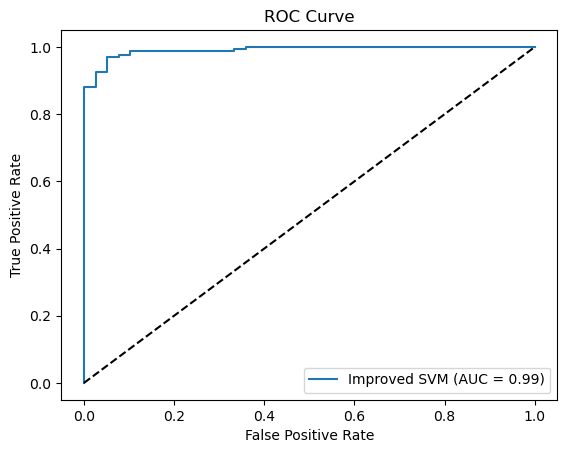

AUC: 0.99


In [15]:
# ROC Curve and AUC
best_svm_y_prob = best_svm.decision_function(X_test_scaled)  # Use decision_function for SVM
fpr, tpr, thresholds = roc_curve(y_test, best_svm_y_prob, pos_label=2)
best_svm_auc = roc_auc_score(y_test, best_svm_y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'Improved SVM (AUC = {best_svm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {best_svm_auc:.2f}")

In [17]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define a function for cross-validation
def evaluate_model_with_cv(model, X, y):
    # Define scoring metrics
    scoring_metrics = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, pos_label=2, average='binary'),
        'recall': make_scorer(recall_score, pos_label=2, average='binary'),
        'f1': make_scorer(f1_score, pos_label=2, average='binary'),
        'roc_auc': 'roc_auc'
    }
    
    # Use StratifiedKFold to maintain class balance
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform cross-validation for each metric
    results = {}
    for metric, scoring in scoring_metrics.items():
        scores = cross_val_score(model, X, y, scoring=scoring, cv=skf, n_jobs=-1)
        results[metric] = {
            'mean': scores.mean(),
            'std': scores.std()
        }
    return results

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Perform cross-validation for each model
cv_results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train_scaled, y_train)  # Train on the full training set
    results = evaluate_model_with_cv(model, X_train_scaled, y_train)
    cv_results[model_name] = results

# Print cross-validation results
for model_name, metrics in cv_results.items():
    print(f"\n{model_name} Cross-Validation Results:")
    for metric, values in metrics.items():
        print(f"{metric.capitalize()} - Mean: {values['mean']:.2f}, Std: {values['std']:.2f}")


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating SVM...

Logistic Regression Cross-Validation Results:
Accuracy - Mean: 0.80, Std: 0.02
Precision - Mean: 0.83, Std: 0.01
Recall - Mean: 0.94, Std: 0.04
F1 - Mean: 0.88, Std: 0.02
Roc_auc - Mean: 0.81, Std: 0.02

Decision Tree Cross-Validation Results:
Accuracy - Mean: 0.90, Std: 0.02
Precision - Mean: 0.93, Std: 0.03
Recall - Mean: 0.95, Std: 0.02
F1 - Mean: 0.94, Std: 0.01
Roc_auc - Mean: 0.84, Std: 0.05

SVM Cross-Validation Results:
Accuracy - Mean: 0.92, Std: 0.02
Precision - Mean: 0.93, Std: 0.01
Recall - Mean: 0.97, Std: 0.01
F1 - Mean: 0.95, Std: 0.01
Roc_auc - Mean: 0.96, Std: 0.01
